In [1]:
import csv
import numpy as np

# list1 = [[] for i in range(12)] 
list1 = [[] for i in range(12)]
ValuesOfK = [2,3,4,5,6,7,8,9,10,20,50,100]
for i in range(1,123):
    for k,j in enumerate(ValuesOfK):
        with open(f'./oracle/as-caida_G_'+
                  str(i).zfill(3)+f'_connected.mtx-{j}',newline='') as f:
            Edges = csv.reader(f, delimiter=',')
            for x in Edges:
                y = [j] + x
                list1[k].append(np.array(x).astype(np.float64)[0:6])


list1 = np.array(list1)
print(list1.shape)

(12, 122, 6)


In [2]:
'''vertex, edge, graph-construct, oracle-construct, query-total, query-average'''

'vertex, edge, graph-construct, oracle-construct, query-total, query-average'

In [14]:
#   v500 = list1[np.where(list1[:,0]==500)]
list2 = np.sort(list1, axis=1)
print(list2[:,:,4])
print(np.average(list2[:,:,4],axis=1))

[[20475.8 20479.3 20479.7 ... 22089.2 22094.8 22141.5]
 [20471.2 20474.  20475.1 ... 22203.7 22365.9 22573.2]
 [20471.  20472.8 20473.6 ... 22107.3 22174.1 22311.8]
 ...
 [20452.8 20470.3 20470.5 ... 22099.1 22166.4 22166.6]
 [20448.8 20471.1 20471.4 ... 22074.2 22091.8 22159.1]
 [20460.3 20471.1 20473.5 ... 22109.2 22116.9 22195.1]]
[21038.71803279 21040.31721311 21045.16557377 21006.4352459
 20993.17622951 21010.48688525 21007.18278689 20957.35327869
 20949.46229508 20965.1352459  20987.97786885 21009.09098361]


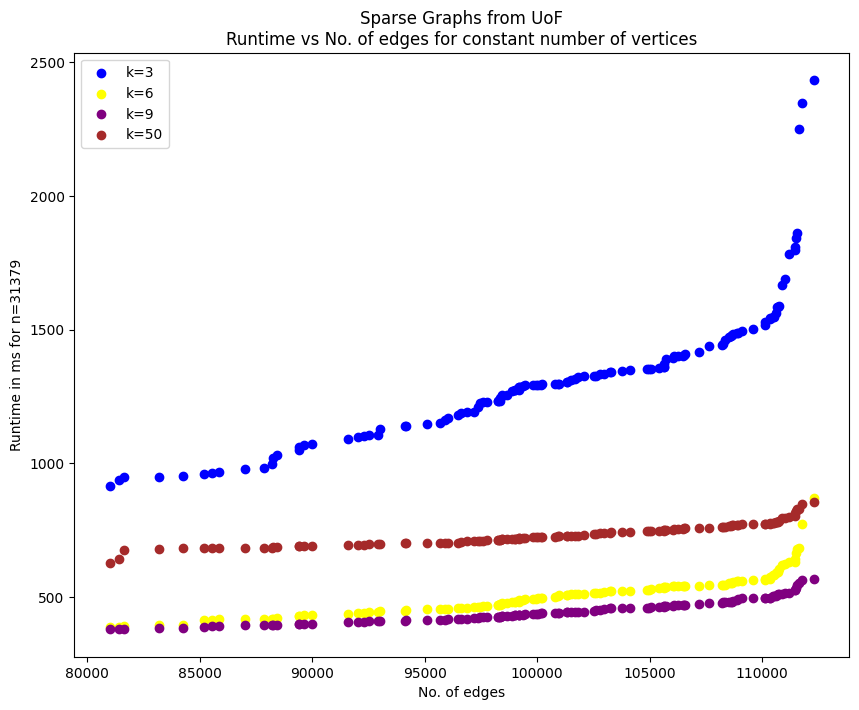

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8), dpi=100)

col = ['red', 'blue', 'green','black','yellow','orange', 'pink','purple', 'cyan', 
       'hotpink','brown','maroon']
for i in range(1,12,3):
    plt.scatter(list2[i,1:,1], list2[i,1:,3], label=f'k={ValuesOfK[i]}', color=col[i])

#     plt.scatter(x_axis, fw, color='orange', label='Floyd-Warshall')
plt.xlabel('No. of edges')
plt.ylabel('Runtime in ms for n=31379')
plt.title('Sparse Graphs from UoF\nRuntime vs No. of edges for constant number of vertices')
plt.legend()
plt.show()

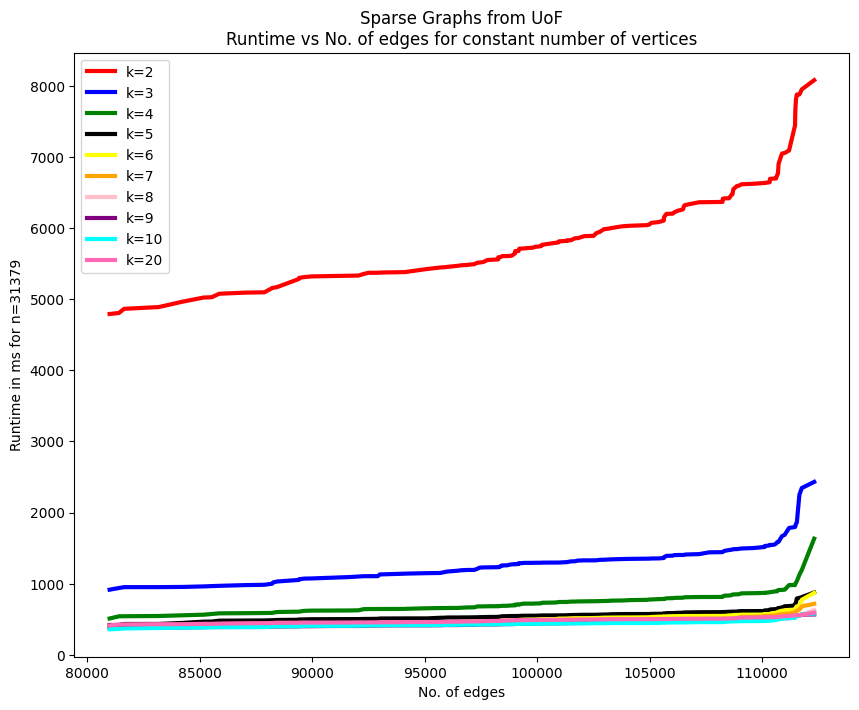

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8), dpi=100)

col = ['red', 'blue', 'green','black','yellow','orange', 'pink','purple', 'cyan', 
       'hotpink','brown','maroon']
for i in range(0,10,1):
    plt.plot(list2[i,1:,1], list2[i,1:,3], label=f'k={ValuesOfK[i]}', color=col[i],
            linewidth=3)

#     plt.scatter(x_axis, fw, color='orange', label='Floyd-Warshall')
plt.xlabel('No. of edges')
plt.ylabel('Runtime in ms for n=31379')
plt.title('Sparse Graphs from UoF\nRuntime vs No. of edges for constant number of vertices')
plt.legend()
plt.show()

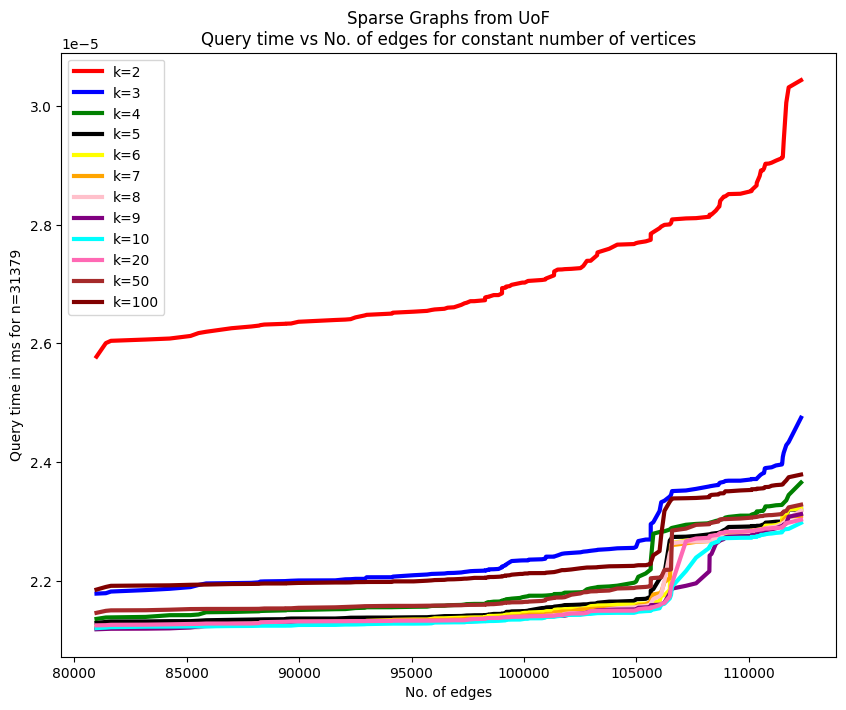

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8), dpi=100)

col = ['red', 'blue', 'green','black','yellow','orange', 'pink','purple', 'cyan', 
       'hotpink','brown','maroon']
for i in range(0,12,1):
    plt.plot(list2[i,1:,1], list2[i,1:,5], label=f'k={ValuesOfK[i]}', color=col[i],
            linewidth=3)

#     plt.scatter(x_axis, fw, color='orange', label='Floyd-Warshall')
plt.xlabel('No. of edges')
plt.ylabel('Query time in ms for n=31379')
plt.title('Sparse Graphs from UoF\nQuery time vs No. of edges for constant number of vertices')
plt.legend()
plt.show()

In [7]:
list3 = []

for i in range(1,123):

    with open(f'./d/as-caida_G_'+
              str(i).zfill(3)+f'_connected.mtx-{0}',newline='') as f:
        Edges = csv.reader(f, delimiter=',')
        for x in Edges:
#             y = [j] + x
            list3.append(np.array(x).astype(np.float64)[0:6])


list3 = np.array(list3)
list4 = np.sort(list3,axis=0)
# print(list4[:,:])
print(list2[:,0:,3])
np.average(list2[:,1:,2], axis=-1)

[[4734.96  4792.6   4806.81  ... 7880.31  7952.07  8081.29 ]
 [ 906.241  914.845  938.52  ... 2250.56  2344.56  2430.98 ]
 [ 503.248  509.426  540.439 ... 1124.8   1192.47  1631.96 ]
 ...
 [ 406.742  413.106  423.763 ...  555.224  562.804  591.344]
 [ 594.784  629.199  641.559 ...  831.808  847.631  857.159]
 [ 938.76  1009.34  1025.54  ... 1314.34  1315.67  1393.82 ]]


array([122.60247273,  99.10422149,  99.10592066,  98.89300413,
        98.84465455,  99.04956942,  99.05470248,  98.71378843,
        99.0970314 ,  98.60849669,  99.31599835,  99.15159421])

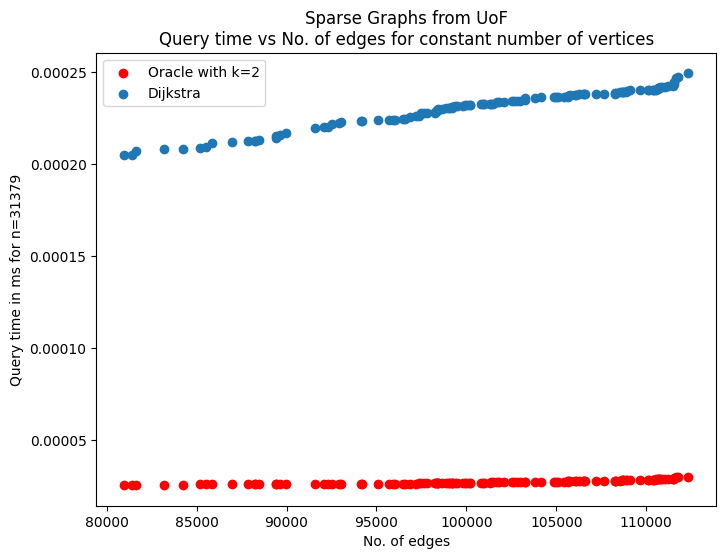

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6), dpi=100)

col = ['red', 'blue', 'green','black','yellow','orange', 'pink','purple', 'cyan', 
       'hotpink','brown','maroon']
for i in range(0,1,2):
    plt.scatter(list2[i,1:,1], list2[i,1:,5], label=f'Oracle with k={ValuesOfK[i]}', color=col[i])

#     plt.scatter(x_axis, fw, color='orange', label='Floyd-Warshall')
plt.scatter(list4[1:,1], list4[1:,3]/list4[1:,0]**2, label="Dijkstra")
plt.xlabel('No. of edges')
plt.ylabel('Query time in ms for n=31379')
plt.title('Sparse Graphs from UoF\nQuery time vs No. of edges for constant number of vertices')
plt.legend()
plt.show()

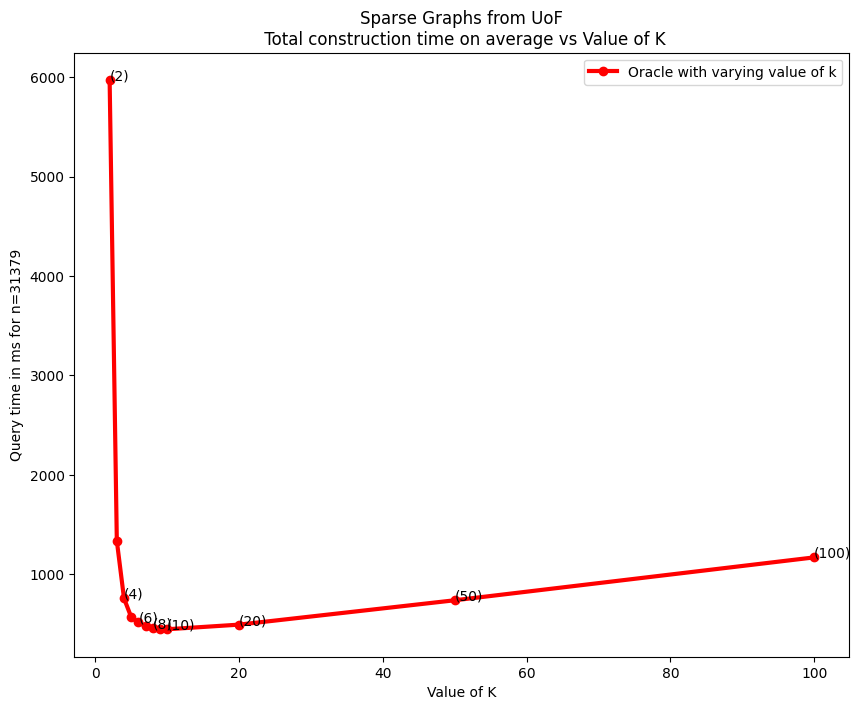

In [20]:
plt.figure(figsize=(10,8), dpi=100)
ax = plt.subplot()

col = ['red', 'blue', 'green','black','yellow','orange', 'pink','purple', 'cyan', 
       'hotpink','brown','maroon']
for i in range(0,1,2):
    plt.plot(ValuesOfK, np.average(list2[:,1:,3], axis=1), marker = 'o',
             label=f'Oracle with varying value of k', color=col[i],linewidth=3)
for i_x, i_y in zip(ValuesOfK, np.average(list2[:,1:,3], axis=1)):
    if i_x%2:
        continue
    plt.text(i_x, i_y, '({})'.format(i_x))
#     plt.scatter(x_axis, fw, color='orange', label='Floyd-Warshall')
# plt.scatter(list4[1:,1], list4[1:,3], label="Dijkstra")
x_axis = np.arange(1,100)
y_axis = x_axis*31379**2/1e8
# plt.plot(x_axis, y_axis, label="Theoretical time",linewidth=3)
plt.xlabel('Value of K')
plt.ylabel('Query time in ms for n=31379')
plt.title('Sparse Graphs from UoF\n Total construction time on average vs Value of K')
plt.legend()
plt.show()

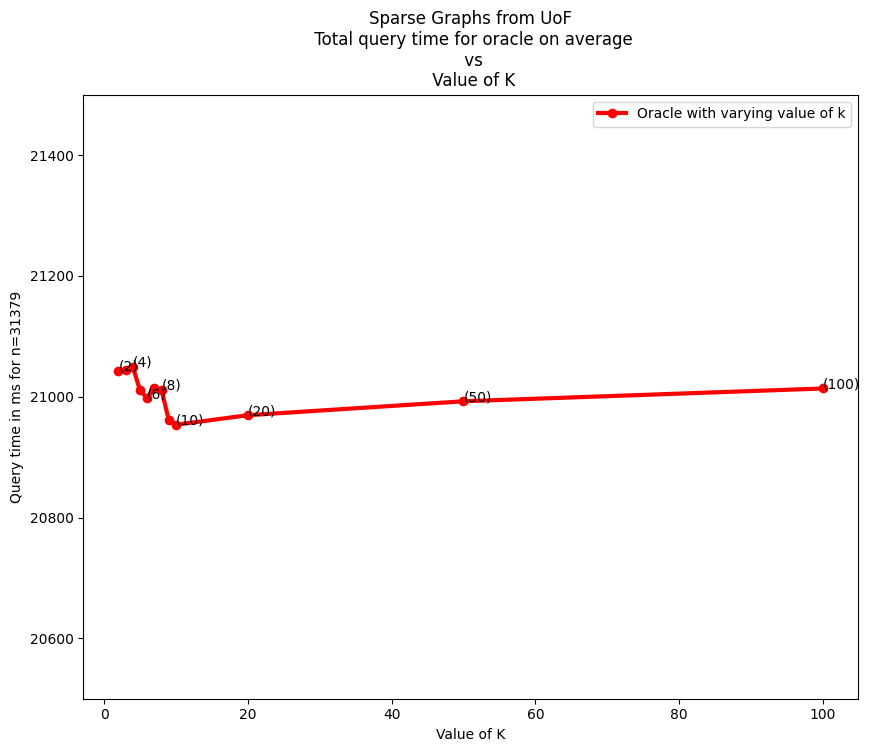

In [18]:
plt.figure(figsize=(10,8), dpi=100)

col = ['red', 'blue', 'green','black','yellow','orange', 'pink','purple', 'cyan', 
       'hotpink','brown','maroon']
for i in range(0,1,2):
    plt.plot(ValuesOfK, np.average(list2[:,1:,4], axis=1), marker = 'o',
             label=f'Oracle with varying value of k', color=col[i],linewidth=3)
    
for i_x, i_y in zip(ValuesOfK, np.average(list2[:,1:,4], axis=1)):
    if i_x%2:
        continue
    plt.text(i_x, i_y, '({})'.format(i_x))
#     plt.scatter(x_axis, fw, color='orange', label='Floyd-Warshall')
# plt.scatter(list4[1:,1], list4[1:,3], label="Dijkstra")
x_axis = np.arange(2,100)
y_axis =[]
def fun():
     for i in x_axis:
        temp = i*np.power(list2[0,0,0],1/i)*np.average(list2[0,1:,1])/4e7
#         print(temp)
        y_axis.append(temp)
fun()
# print(y_axis)         
# plt.plot(x_axis, y_axis, label="Theoretical query time")
plt.ylim([20500,21500])
plt.xlabel('Value of K')
plt.ylabel('Query time in ms for n=31379')
plt.title('Sparse Graphs from UoF\n Total query time for oracle on average\n vs\n Value of K')
plt.legend()
plt.show()